<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class6/program03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 증강된 영상 인식하기

In [1]:
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1.데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype('float32'); x_train /= 255;
x_train = x_train[0:15,]; y_train = y_train[0:15,]; # 앞 15개에 대해서만 증대 적용
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

## 2.시각화

<ipython-input-3-22fc3270eb4d>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


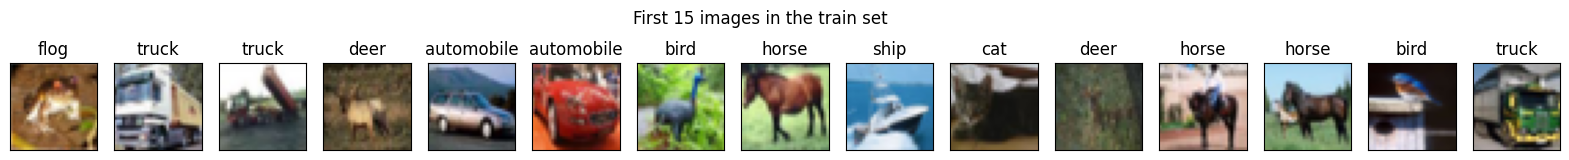

In [3]:
plt.figure(figsize=(20,2))
plt.suptitle('First 15 images in the train set')
for i in range(15):
  plt.subplot(1, 15, i+1)
  plt.imshow(x_train[i])
  plt.xticks([]); plt.yticks([]);
  plt.title(class_names[int(y_train[i])])
plt.show()

## 3.이미지 생성

In [4]:
batch_siz = 4
generator = ImageDataGenerator(rotation_range=20.0, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
gen = generator.flow(x_train, y_train, batch_size=batch_siz)

<ipython-input-5-bbda8b8baf99>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


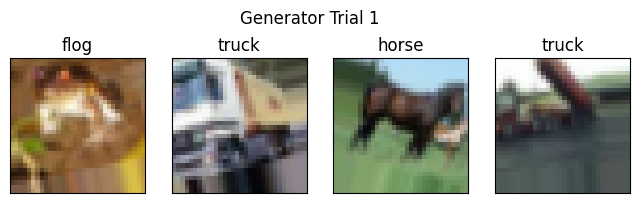

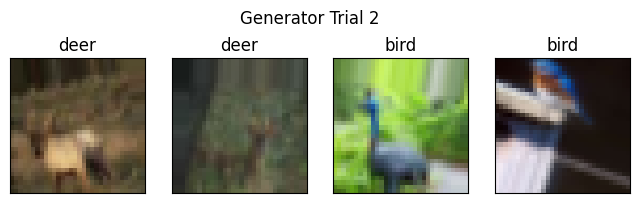

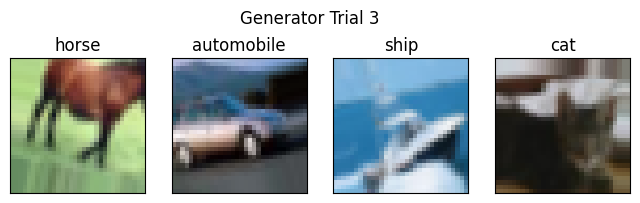

In [5]:
for a in range(3):
  img, label = gen.next()
  plt.figure(figsize=(8,2.4))
  plt.suptitle('Generator Trial ' + str(a+1))
  for i in range(batch_siz):
    plt.subplot(1, batch_siz, i+1)
    plt.imshow(img[i])
    plt.xticks([]); plt.yticks([]);
    plt.title(class_names[int(label[i])])
  plt.show()